In [24]:
import sys
import pandas as pd
from ema_workbench.analysis.parcoords import ParallelAxes, get_limits
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
sys.path.append('..')

In [25]:
import rbf_functions

In [82]:
rbfs = [rbf_functions.squared_exponential_rbf,
        rbf_functions.gaussian_rbf,
        rbf_functions.inverse_quadric_rbf
       ]

pareto_sets = {}
for entry in rbfs:
    name = entry.__name__
    output_dir = f"../output/{name}/"
    
    results = pd.read_csv(output_dir + '10_solution.csv')
    results['environment'] = 1 - results['environment']
    
    pareto_sets[name] = results


In [158]:
df_se = pareto_sets['squared_exponential_rbf'].copy()
print(df_se.max())
print(df_se.idxmax())
# print(df_se.min())
# print(df_se.idxmin())
df_max = pd.DataFrame(columns=df_se.columns)
df_max = df_max.append(df_se.loc[275])
df_max = df_max.append(df_se.loc[296])
df_max = df_max.append(df_se.loc[217])
df_max = df_max.append(df_se.loc[146])
df_max = df_max.append(df_se.loc[321])
df_max = df_max.append(df_se.loc[0])
df_max

hydropower          80.308976
atomicpowerplant     0.999851
baltimore            0.916382
chester              0.950887
environment          0.956494
recreation           1.000000
dtype: float64
hydropower          275
atomicpowerplant    296
baltimore           217
chester             146
environment         321
recreation            0
dtype: int64


,hydropower,atomicpowerplant,baltimore,chester,environment,recreation
275,80.308976,0.958537,0.163335,0.285727,0.908019,1.000000
296,79.531990,0.999851,0.916279,0.949987,0.895947,1.000000
217,79.177732,0.999580,0.916382,0.949875,0.900927,1.000000
146,78.805231,0.999461,0.914316,0.950887,0.900276,1.000000
321,45.120830,0.400784,0.465564,0.303923,0.956494,0.964286
0,73.154201,0.778500,0.640140,0.743475,0.913032,1.000000


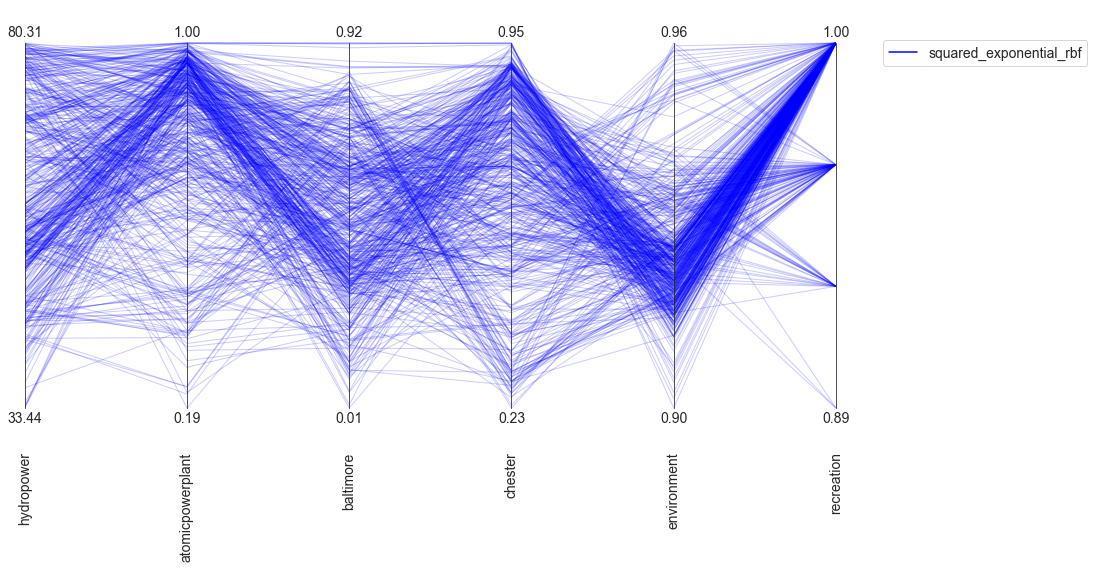

In [157]:
limits = get_limits(df_se)
axes = ParallelAxes(limits)    
axes.plot(df_se, label='squared_exponential_rbf', lw=1, color='blue', alpha=0.2)
axes.legend()
plt.show()



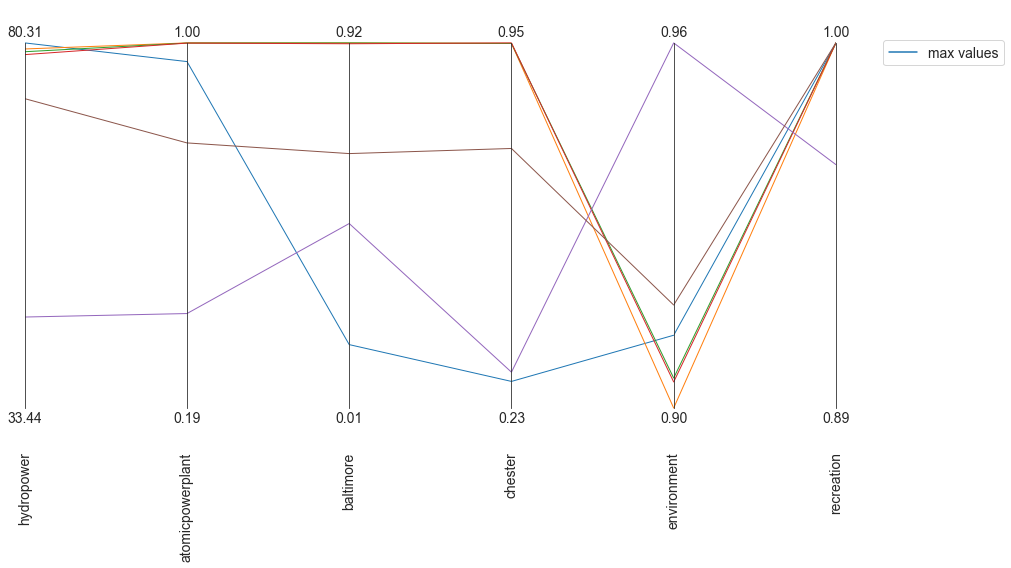

In [155]:
limits = get_limits(df_se)
axes = ParallelAxes(limits)    
axes.plot(df_max, label='max values', lw=1, alpha=1)
axes.legend()
plt.show()

In [143]:
import plotly.express as px

fig = px.parallel_coordinates(df_se)
fig.show()

<AxesSubplot:>

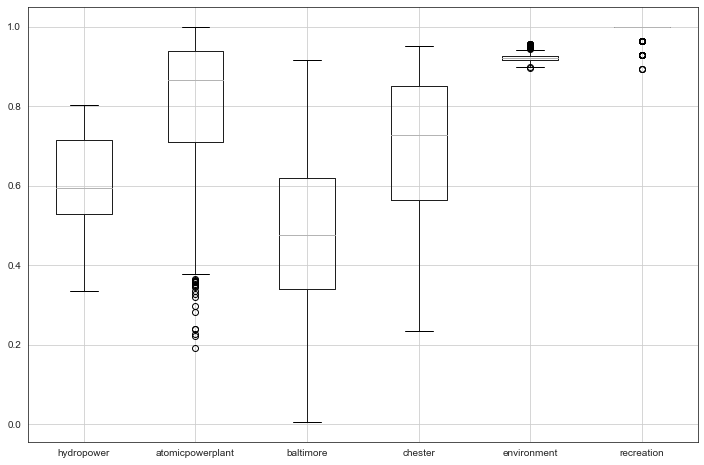

In [87]:
boxp = pareto_sets['squared_exponential_rbf'].copy()
boxp['hydropower'] = boxp['hydropower']/100
boxp.boxplot()

In [156]:
fig = px.scatter_matrix(df_se)
fig.update_traces(diagonal_visible=False)
fig.show()